# Assessing student performance from Open University Learning Analytics Dataset (OULAD)

In this assignment, we will assess the risk of a student failing a course module based on student characterstics (gender, age, etc.) and information about their activity (studied credits, number of previous attempts to pass the course). To do that, we will train a student model using logistic regression.

Then, we will try to improve the model's performance in terms of accuracy by using the assignments' grades as an additional factor.

In [1]:
#import all the python libraries that we will need for our analysis

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# remove Future Warning message
# Reference:
# https://stackoverflow.com/questions/40659212/futurewarning-elementwise-comparison-failed-returning-scalar-but-in-the-futur
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#read student information
studentInfo = pd.read_csv("studentInfo.csv") 
#print out the 10 first rows of the data
studentInfo.head(10)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
5,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass
6,AAA,2013J,45462,M,Scotland,HE Qualification,30-40%,0-35,0,60,N,Pass
7,AAA,2013J,45642,F,North Western Region,A Level or Equivalent,90-100%,0-35,0,120,N,Pass
8,AAA,2013J,52130,F,East Anglian Region,A Level or Equivalent,70-80%,0-35,0,90,N,Pass
9,AAA,2013J,53025,M,North Region,Post Graduate Qualification,NaN,55<=,0,60,N,Pass


In [4]:
# lets see all potential final results
studentInfo["final_result"].unique()

array(['Pass', 'Withdrawn', 'Fail', 'Distinction'], dtype=object)

In [5]:
#create a new column to classify final results. classify studets with a pass or distinction as "1", the rest as "0"
studentInfo["result.class"] = 1

#studentInfo["result.class"] = studentInfo["final_result"].apply(lambda x: 0 if (x == 'Fail') | x == "Withdrawn") else 1)
studentInfo["result.class"].loc[(studentInfo["final_result"] == "Withdrawn") | (studentInfo["final_result"] == "Fail")] = 0

#and look at the dataset again
studentInfo.head()

/Users/enlik/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,result.class
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,1
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1


In [6]:
Xfactors = studentInfo[["gender", "region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability"]]
X_noncat = pd.get_dummies(Xfactors)

X_noncat.head(5)

,num_of_prev_attempts,studied_credits,gender_F,gender_M,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,...,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_0-35,age_band_35-55,age_band_55<=,disability_N,disability_Y
0,0,240,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
1,0,60,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,60,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0,60,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,0,60,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [7]:
Youtcome = studentInfo["result.class"].values
Youtcome

array([1, 1, 0, ..., 1, 0, 1])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_noncat, Youtcome, test_size = 0.3, random_state = 0)

# Reference 
# https://machinelearningmastery.com/how-to-fix-futurewarning-messages-in-scikit-learn/
OurModel = LogisticRegression(solver='liblinear')
OurModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# predict on a testset
y_pred = OurModel.predict(X_test)
print("Accuracy of logistic regression classifier on test set: {:.2f}".format(OurModel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.61


In [10]:
#read additional data
studentAssessments = pd.read_csv("studentAssessment.csv")
assessments = pd.read_csv("assessments.csv")

In [11]:
# studentAssessments.head(10)
# assessments.head(10)

In [12]:
#retrieve the ids only of the teacher assessments (TMA)
TAM = assessments.loc[assessments['assessment_type'] == "TMA"]

#then keep the students assessments (grades) that were only given by the teacher (TAM), 
#remove unknown entries ("?"), and also 'NaN' value
TAM_student_grades = studentAssessments.loc[studentAssessments.id_assessment.isin(TAM["id_assessment"])]
TAM_student_grades = TAM_student_grades.loc[TAM_student_grades['score'] != '?']
TAM_student_grades = TAM_student_grades.loc[TAM_student_grades['score'] != 'nan']

In [13]:
#create an empty list where we will save the average grade for each and every student
avg_grades = [] 

In [14]:
#for each student find all TMA scores for the course we are interested, and get the mean value

for i in range (0, len(studentInfo['id_student'])):
    
    this_student = studentAssessments.loc[(studentAssessments['id_student'] == studentInfo['id_student'][i]) &
                                          (studentAssessments['score'] != '?') & 
                                          (studentAssessments['score'] != 'nan')]
    
    assmt = list(this_student['id_assessment'])
    score = list(this_student['score'].astype(float))
    # must be converted to 'float' instead of 'int'
    # reference: 
    # https://stackoverflow.com/questions/41550746/error-using-astype-when-nan-exists-in-a-dataframe/41550787

    final_score = 0
    for j in range(0, len(assmt)):
        idx = assessments.loc[assessments.id_assessment == assmt[j]].index[0]
        if((assessments.code_module[idx] == studentInfo['code_module'][i]) & (assessments.assessment_type[idx] == "TMA")):
            final_score = final_score + (float(assessments.weight[idx])*score[j])/100
            
    avg_grades.append(final_score)
    
#add the new information about average TAM grades to the student information dataframe

studentInfo['avg_TMA_assessment'] = avg_grades

In [15]:
studentInfo['gender'].unique

<bound method Series.unique of 0        M
1        F
2        F
3        F
4        F
        ..
32588    F
32589    F
32590    F
32591    F
32592    F
Name: gender, Length: 32593, dtype: object>

In [16]:
#add the new information about average TAM grades to our model

Xfactors_updated = studentInfo[["gender", "region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "avg_TMA_assessment"]]
X_noncat_updated = pd.get_dummies(Xfactors_updated)
X_noncat_updated = X_noncat_updated.fillna(0)

X_noncat_updated.head(5)


,num_of_prev_attempts,studied_credits,avg_TMA_assessment,gender_F,gender_M,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,...,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_0-35,age_band_35-55,age_band_55<=,disability_N,disability_Y
0,0,240,82.4,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
1,0,60,65.4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,60,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,60,76.3,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,0,60,55.0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [26]:
#fit the model again
X_train, X_test, y_train, y_test = train_test_split(X_noncat_updated, Youtcome, test_size=0.3, random_state=0)

OurModelUpdated = LogisticRegression(solver='liblinear')
OurModelUpdated.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
#predict on a testset
y_predUpdated = OurModelUpdated.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(OurModelUpdated.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


There is an improvement from our model. The model now can assess students' performance with 83% accuracy! It means that the grades of Teacher Marked Assignments (TMA) really helped us to improve the performance of our model

# Part 2 - Evaluate and Choose Best Model

## Updated Model using CMA
I"m trying to add CMA as our second feature for our model

In [31]:
#retrieve the ids only of the CMA type assessments
CMA = assessments.loc[assessments['assessment_type'] == "CMA"]

#then keep the students assessments (grades) that were only given by the teacher (TAM), 
#remove unknown entries ("?"), and also 'NaN' value
CMA_student_grades = studentAssessments.loc[studentAssessments.id_assessment.isin(CMA["id_assessment"])]
CMA_student_grades = CMA_student_grades.loc[CMA_student_grades['score'] != '?']
CMA_student_grades = CMA_student_grades.loc[CMA_student_grades['score'] != 'nan']

In [35]:
#create an empty list where we will save the average grade for each and every student
avg_grades_CMA = [] 

In [36]:
#for each student find all TMA scores for the course we are interested, and get the mean value

for i in range (0, len(studentInfo['id_student'])):
    
    this_student = studentAssessments.loc[(studentAssessments['id_student'] == studentInfo['id_student'][i]) &
                                          (studentAssessments['score'] != '?') & 
                                          (studentAssessments['score'] != 'nan')]
    
    assmt = list(this_student['id_assessment'])
    score = list(this_student['score'].astype(float))
    # must be converted to 'float' instead of 'int'
    # reference: 
    # https://stackoverflow.com/questions/41550746/error-using-astype-when-nan-exists-in-a-dataframe/41550787

    final_score = 0
    for j in range(0, len(assmt)):
        idx = assessments.loc[assessments.id_assessment == assmt[j]].index[0]
        if((assessments.code_module[idx] == studentInfo['code_module'][i]) & (assessments.assessment_type[idx] == "TMA")):
            final_score = final_score + (float(assessments.weight[idx])*score[j])/100
            
    avg_grades_CMA.append(final_score)
    
#add the new information about average TAM grades to the student information dataframe

studentInfo['avg_CMA_assessment'] = avg_grades_CMA

In [77]:
#add the new information about average CMA grades to our model

Xfactors_updated_CMA = studentInfo[["gender", "region", "highest_education", "imd_band", "age_band", "num_of_prev_attempts", "studied_credits", "disability", "avg_TMA_assessment", "avg_CMA_assessment"]]
X_noncat_updated_CMA = pd.get_dummies(Xfactors_updated_CMA)
X_noncat_updated_CMA = X_noncat_updated_CMA.fillna(0)

X_noncat_updated_CMA.head(10)

,num_of_prev_attempts,studied_credits,avg_TMA_assessment,avg_CMA_assessment,gender_F,gender_M,region_East Anglian Region,region_East Midlands Region,region_Ireland,region_London Region,...,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_0-35,age_band_35-55,age_band_55<=,disability_N,disability_Y
0,0,240,82.4,0.0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
1,0,60,65.4,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,60,0.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,60,76.3,0.0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,0,60,55.0,0.0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
5,0,60,66.9,0.0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
6,0,60,67.8,0.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
7,0,120,72.5,0.0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
8,0,90,71.2,0.0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
9,0,60,79.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [78]:
#fit the model again
X_train, X_test, y_train, y_test = train_test_split(X_noncat_updated_CMA, Youtcome, test_size=0.3, random_state=0)

OurModelUpdatedCMA = LogisticRegression(solver='liblinear')
OurModelUpdatedCMA.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
#predict on a testset
y_predUpdatedCMA = OurModelUpdatedCMA.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(OurModelUpdatedCMA.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


Adding CMA into our model give around 1% improvement on accuracy, but it seems not enough to be categorized as feature variables. We decided to not follow up this model.

In [115]:
# Change our train and test data using X_noncat_update
X_train, X_test, y_train, y_test = train_test_split(X_noncat_updated, Youtcome, test_size = 0.3, random_state = 0)


## K-Nearest Neighbours Model

In [116]:
from sklearn.neighbors import KNeighborsClassifier
OurModelKNN = KNeighborsClassifier(n_neighbors=3)
OurModelKNN.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [117]:
# KNN predict on a testset
print("Accuracy of KNN classifier on test set: {:.2f}".format(OurModelKNN.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.84


From the result above, our KNN model also doesn't give significant improvement compare to our Logistic Regression model. Based on this case, we decided not to continue the work using this model.

## Decision Tree Model

In [118]:
from sklearn import tree
OurModelDT = tree.DecisionTreeClassifier()
OurModelDT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [119]:
# DT predict on a testset
print("Accuracy of Decision Tree classifier on test set: {:.2f}".format(OurModelDT.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.80


Same like our previous KNN model, it seems our Decision Tree model doesn't improve the accuracy as well. We decided not to continue using this model

## Neural Network MLPClassifier

In [120]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X_noncat, Youtcome, test_size=0.3, random_state=0)
OurModelMLP = MLPClassifier(alpha=1, max_iter=200)
OurModelMLP.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [121]:
# DT predict on a testset
y_predMLP = OurModelMLP.predict(X_test)
print("Accuracy of MLP classifier on test set: {:.2f}".format(OurModelMLP.score(X_test, y_test)))

Accuracy of MLP classifier on test set: 0.60


Our Neural Network MLP Classified model, have similar accuracy with our LogisticRegression Model, so we decide to follow up this model

In [122]:
# fit the model again
X_train, X_test, y_train, y_test = train_test_split(X_noncat_updated, Youtcome, test_size=0.3, random_state=0)
OurModelMLP2 = MLPClassifier(alpha=1, max_iter=200)
OurModelMLP2.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [123]:
#predict on a testset
y_predMLP2 = OurModelMLP2.predict(X_test)
print('Accuracy of MLP Classifier on test set: {:.2f}'.format(OurModelMLP2.score(X_test, y_test)))

Accuracy of MLP Classifier on test set: 0.86


The accuracy of our updated MLP Classifier was 3% more than our updated Logistic Classifier. It's an improvement :)

## Confusion Matrix
The Confusion matrix was used to identify which classes were predicted correctly and the others which are incorrect
Reference:
https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

In [80]:
from sklearn.metrics import confusion_matrix

modelCM = confusion_matrix(y_test, y_pred)
print(modelCM)

[[3387 1730]
 [2075 2586]]


The result above show this information:
* 3387 people predicted will have their course failed and they truly failed
* 1730 people predicted will passing the course, but they are failed
* 2075 people predicted will have their course failed, but they passed the course
* 2586 people predicted will passing their course, and they truly passed

In summary, 1730 + 2075 = 3805 people were misclassified

In [127]:
modelUpdatedCM = confusion_matrix(y_test, y_predMLP2)
print(modelUpdatedCM)

[[4348  769]
 [ 615 4046]]


Information from confusion matrix above for our updated model:

* 4348 people predicted will have their course failed and they truly failed
* 769 people predicted will passing the course, but they are failed
* 615 people predicted will have their course failed, but they passed the course
* 4046 people predicted will passing their course, and they truly passed

As we can see, the total misclassified people, 763 + 866 = 1385, more than 50% improved compared to our previous model

## ROC Curves

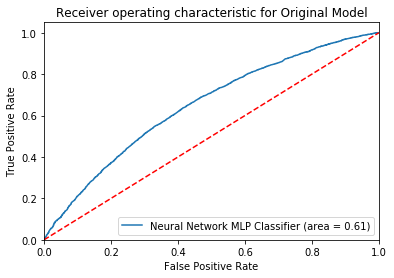

In [101]:
#try out the ROC curve of the first model (OurModelMLP)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

X_train, X_test, y_train, y_test = train_test_split(X_noncat, Youtcome, test_size=0.3, random_state=0)
OurModelMLP = MLPClassifier(alpha=1, max_iter=200)
OurModelMLP.fit(X_train, y_train)

logit_roc_auc = roc_auc_score(y_test, OurModelMLP.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, OurModelMLP.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Neural Network MLP Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Original Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

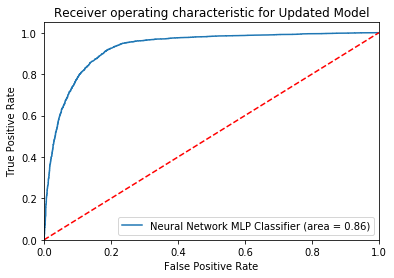

In [102]:
#try out the ROC curve of the second model (OurModelMLP2)

X_train, X_test, y_train, y_test = train_test_split(X_noncat_updated, Youtcome, test_size=0.3, random_state=0)
OurModelMLP2 = MLPClassifier(alpha=1, max_iter=200)
OurModelMLP2.fit(X_train, y_train)

logit_roc_auc = roc_auc_score(y_test, OurModelMLP2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, OurModelMLP2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Neural Network MLP Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Updated Model')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()